In [197]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Rydder dataen

In [198]:
# Leser data
local_path = '/Users/ellajohnsen/Documents/GitHub/NAV/fiktivt_kursdatasett.csv'
client_data = pd.read_csv(local_path)

client_data.sample(5)

,ID,jobb_etter_6mnd,utdanning,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,alder,fylke,yrke,kjonn
5592,3505,Ja,VGS fullf,Nei,Nei,Ja,Ja,22,Nord-Trøndelag,"Salg, service og omsorg",Kvinne
2606,4160,Nei,VGS ikke fullf,Nei,Nei,Nei,Nei,29,Rogaland,"Salg, service og omsorg",Mann
1882,6286,Ja,VGS fullf,Nei,Ja,Nei,Ja,36,Sør-Trøndelag,Kontoryrker,Kvinne
2808,6606,Nei,VGS fullf,Ja,Nei,Nei,Nei,42,Rogaland,"Salg, service og omsorg",Kvinne
1031,4033,Nei,Grunnskole,Nei,Nei,Nei,Nei,45,Troms,Ledere,Kvinne


In [199]:
utdanning = client_data['utdanning']

For å forenkle datasettet litt setter jeg 1 = Ja, 2 = Nei og 1 = Kvinne, 0 = Mann

In [200]:
client_data = client_data.replace(to_replace='Ja', value=1)
client_data = client_data.replace(to_replace='Nei', value=0)
client_data = client_data.replace(to_replace='Kvinne', value=1)
client_data = client_data.replace(to_replace='F', value=1)
client_data = client_data.replace(to_replace='Mann', value=0)
client_data = client_data.replace(to_replace='M', value=0)

client_data[["kjonn"]] = client_data[["kjonn"]].apply(pd.to_numeric)


client_data.sample(5)

,ID,jobb_etter_6mnd,utdanning,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,alder,fylke,yrke,kjonn
5633,4298,0,VGS ikke fullf,0,0,1,0,30,Nord-Trøndelag,Akademiske yrker,0
1740,3755,0,VGS fullf,0,1,0,0,27,Sør-Trøndelag,Håndverkere,1
1401,5909,0,Høyere utd 4 år+,1,0,1,0,31,Telemark,Annet,0
683,7043,0,VGS fullf,0,1,0,0,36,Vest-Agder,Ledere,0
7076,2817,1,VGS ikke fullf,0,1,0,1,39,Hedmark,Kontoryrker,1


In [201]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8822 entries, 0 to 8821
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  8822 non-null   int64 
 1   jobb_etter_6mnd     8822 non-null   int64 
 2   utdanning           7640 non-null   object
 3   sykdom_siste_aar    8822 non-null   int64 
 4   arbsoker_siste_aar  8822 non-null   int64 
 5   forerkort           8822 non-null   int64 
 6   arbeid_siste_2mnd   8822 non-null   int64 
 7   alder               8822 non-null   int64 
 8   fylke               8822 non-null   object
 9   yrke                8822 non-null   object
 10  kjonn               8822 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 758.3+ KB


In [202]:
client_data[['jobb_etter_6mnd', 'sykdom_siste_aar', 'arbsoker_siste_aar', 
            'forerkort', 'arbeid_siste_2mnd', 'alder', 'kjonn']].describe()

,jobb_etter_6mnd,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,alder,kjonn
count,8822.000000,8822.000000,8822.000000,8822.000000,8822.000000,8822.000000,8822.000000
mean,0.391181,0.268873,0.250283,0.399229,0.397982,38.012582,0.399909
std,0.488042,0.443399,0.433201,0.489768,0.489510,106.454696,0.489907
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,43.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,9999.000000,1.000000


Maks alder kan ikke være 9999 år så undersøker det

In [203]:
test = client_data.nlargest(5, ['alder'])
test.sample(5)

,ID,jobb_etter_6mnd,utdanning,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,alder,fylke,yrke,kjonn
646,5822,0,VGS ikke fullf,1,0,1,0,60,Vest-Agder,Ledere,0
503,1950,1,NaN,0,0,1,0,60,Vest-Agder,Kontoryrker,0
229,4653,0,Grunnskole,0,0,0,1,60,Vestfold,Ledere,0
395,8031,0,NaN,0,1,0,0,60,Vestfold,Annet,1
4885,505,0,VGS ikke fullf,1,0,0,0,9999,Oppland,"Bønder, fiskere, mv",0


In [204]:
# Fjerner datapunktet 4885
client_data = client_data.drop([4885])

test = client_data.nlargest(5, ['alder'])
test.sample(5)

,ID,jobb_etter_6mnd,utdanning,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,alder,fylke,yrke,kjonn
503,1950,1,NaN,0,0,1,0,60,Vest-Agder,Kontoryrker,0
395,8031,0,NaN,0,1,0,0,60,Vestfold,Annet,1
646,5822,0,VGS ikke fullf,1,0,1,0,60,Vest-Agder,Ledere,0
811,3172,1,Høyere utd u4 år,0,0,0,0,60,Ukjent,Akademiske yrker,0
229,4653,0,Grunnskole,0,0,0,1,60,Vestfold,Ledere,0


In [205]:
client_data[['jobb_etter_6mnd', 'sykdom_siste_aar', 'arbsoker_siste_aar', 
            'forerkort', 'arbeid_siste_2mnd', 'alder', 'kjonn']].describe()

,jobb_etter_6mnd,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,alder,kjonn
count,8821.000000,8821.000000,8821.000000,8821.000000,8821.000000,8821.000000,8821.000000
mean,0.391225,0.268790,0.250312,0.399274,0.398027,36.883347,0.399955
std,0.488052,0.443356,0.433217,0.489777,0.489519,9.112343,0.489916
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,43.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000,1.000000


In [206]:
# Prosent sjanse for at man er i jobb etter seks måneder
client_data.jobb_etter_6mnd.sum() / len(client_data.jobb_etter_6mnd)

0.3912254846389298

## Decision Tree

Ser bort fra utdanning, fylke og yrke da det blir mange forskjellige labels men er absolutt noe man egentlig bør ha med

In [207]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import seaborn as sns

In [208]:
y = client_data['jobb_etter_6mnd'].copy()      # target variable

features = ['sykdom_siste_aar', 'arbsoker_siste_aar', 'forerkort', 'arbeid_siste_2mnd', 'alder', 'kjonn']
X = client_data[features].copy()

In [209]:
# Splitting into test and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [210]:
# Checking that the split is ok

print(client_data.jobb_etter_6mnd.describe())
print("---------------------------")
print(y_train.describe())
print("---------------------------")
print(y_test.describe())

count    8821.000000
mean        0.391225
std         0.488052
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: jobb_etter_6mnd, dtype: float64
---------------------------
count    7056.000000
mean        0.390448
std         0.487885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: jobb_etter_6mnd, dtype: float64
---------------------------
count    1765.000000
mean        0.394334
std         0.488846
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: jobb_etter_6mnd, dtype: float64


In [211]:
classifier = DecisionTreeClassifier(max_depth=10, random_state=42) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

accuracy_score(y_true = y_test, y_pred = predictions)

0.7439093484419264

In [212]:
pd.DataFrame(
    confusion_matrix(y_test, predictions),
    columns=['Predikert arbeidsledig', 'Predikert ansettelse'],
    index=['Reel arbeidsledig', 'Reel ansettelse']
)

,Predikert arbeidsledig,Predikert ansettelse
Reel arbeidsledig,865,204
Reel ansettelse,248,448


In [213]:
def feature_plot(features):
    tmp = pd.DataFrame({'Feature': features, 'Feature importance': classifier.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (10,4))
    plt.title('Features importance',fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()  

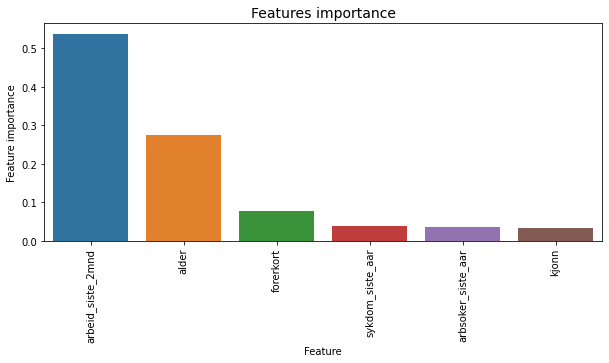

In [214]:
feature_plot(features)

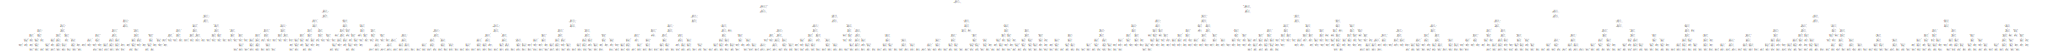

In [215]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(classifier, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

## Random Forest

In [216]:
from sklearn.ensemble import RandomForestClassifier

In [217]:
classifier = RandomForestClassifier(random_state=2018)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

accuracy_score(y_true = y_test, y_pred = predictions)

0.75014164305949

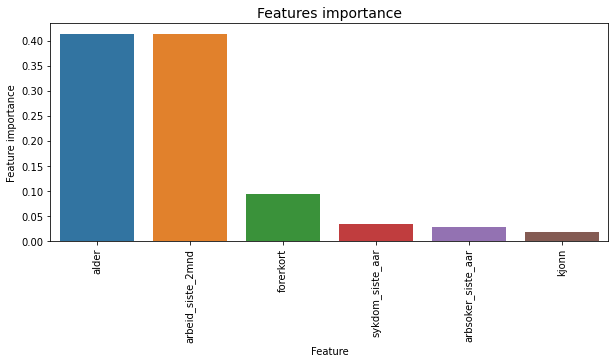

In [218]:
feature_plot(features)

In [219]:
pd.DataFrame(
    confusion_matrix(y_test, predictions),
    columns=['Predikert arbeidsledig', 'Predikert ansettelse'],
    index=['Reel arbeidsledig', 'Reel ansettelse']
)

,Predikert arbeidsledig,Predikert ansettelse
Reel arbeidsledig,871,198
Reel ansettelse,243,453
